In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

from scipy.spatial import Voronoi, voronoi_plot_2d
from utils import *
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib as mpl

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


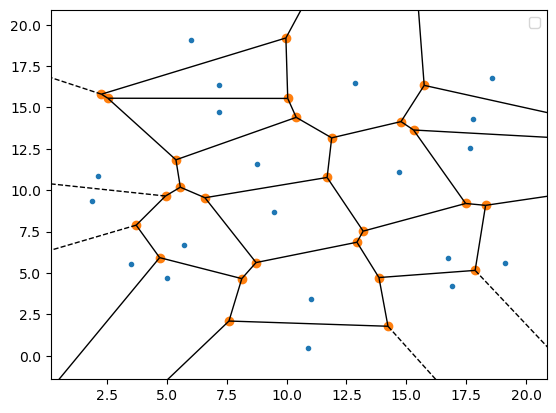

In [2]:
dim_x = 20 
dim_y = 20 
npoints = 20
points = np.random.uniform(0, 20, (npoints, 2))
vor = Voronoi(points)


fig = voronoi_plot_2d(vor)
plt.legend()
plt.show()


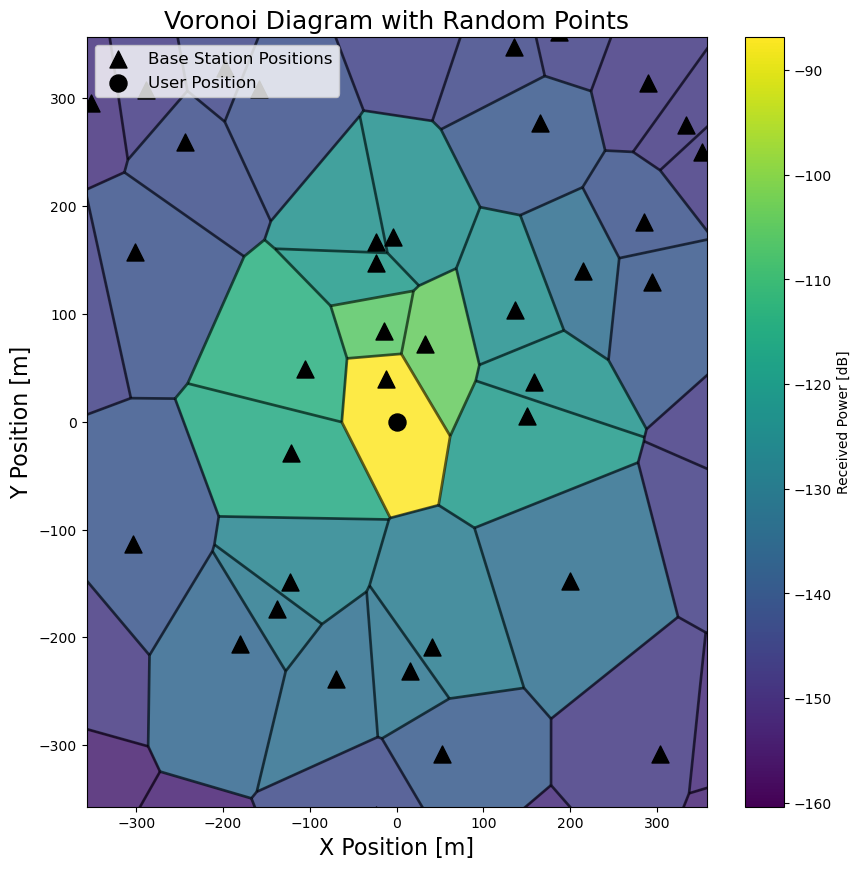

In [3]:
np.random.seed(18)

# Set parameters
dim = 500
npoints = 64

user_position = np.array([0, 0])

# Generate random points
points = np.random.uniform(-dim, dim, (npoints, 2))

# Create Voronoi diagram
vor = Voronoi(points)

# Plot Voronoi diagram with customizations
fig, ax = plt.subplots(figsize=(10, 10))  # Increase figure size
voronoi_plot_2d(vor, show_vertices=False, show_points=False, line_colors='k', line_width=2, line_alpha=0.6, ax=ax)

powers = received_power(points, alpha=6)

minima = min(10*np.log10(powers))
maxima = max(10*np.log10(powers))

# Normalize chosen colormap
norm = mpl.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
#mapper = cm.ScalarMappable(norm=norm, cmap=cm.OrRd)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.viridis)

for r in range(len(vor.point_region)):
    region_index = vor.point_region[r]
    region = vor.regions[region_index]
    if region_index != -1 and -1 not in region and len(region) > 2:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), color=mapper.to_rgba(10*np.log10(powers[r])), alpha=0.85)

# Plot points
plt.scatter(points[:, 0], points[:, 1], c='black', marker='^',  label='Base Station Positions', s=150)
plt.scatter(user_position[0], user_position[1], c='black', marker='o', label='User Position', s=150)

# Set plot limits and labels
plt.xlim(-dim/1.4, dim/1.4)
plt.ylim(-dim/1.4, dim/1.4)
plt.xlabel('X Position [m]', fontsize=16)
plt.ylabel('Y Position [m]', fontsize=16)
plt.title('Voronoi Diagram with Random Points', fontsize=18)

# Add colorbar
#sm = plt.cm.ScalarMappable(cmap=cm.OrRd, norm=norm)
sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Received Power [dB]')

# Add legend
plt.legend(loc='upper left', fontsize=12)

# Show the plot
#plt.grid(True)
plt.show()


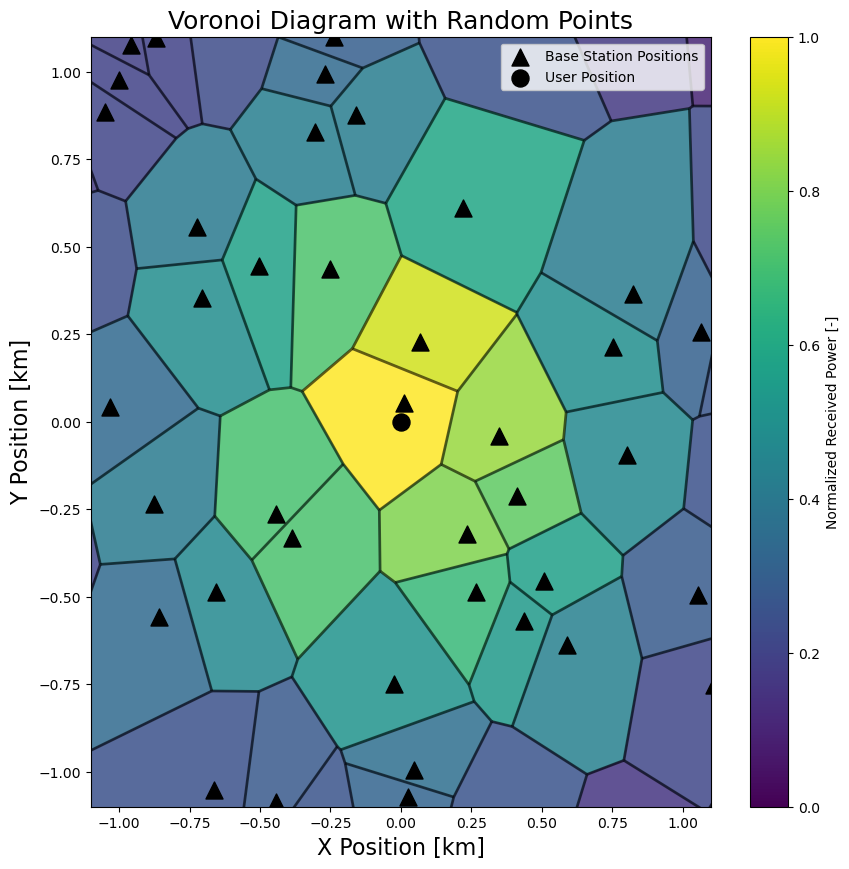

In [4]:
np.random.seed(2)

# Set parameters
dim = 2.2
npoints = 10

user_position = np.array([0, 0])

# Generate random points
points = np.random.uniform(-dim*2, dim*2, (npoints*50, 2))

# Create Voronoi diagram
vor = Voronoi(points)

# Plot Voronoi diagram with customizations
fig, ax = plt.subplots(figsize=(10, 10))  # Increase figure size
voronoi_plot_2d(vor, show_vertices=False, show_points=False, line_colors='k', line_width=2, line_alpha=0.6, ax=ax)

powers = received_power(points)

minima = min(powers)
maxima = max(powers)

# Normalize chosen colormap
norm = mpl.colors.Normalize(vmin=0, vmax=1, clip=True)
#mapper = cm.ScalarMappable(norm=norm, cmap=cm.OrRd)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.viridis)

for r in range(len(vor.point_region)):
    region_index = vor.point_region[r]
    region = vor.regions[region_index]
    if region_index != -1 and -1 not in region and len(region) > 2:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), color=mapper.to_rgba(powers[r]/np.max(powers)), alpha=0.85)

# Plot points
plt.scatter(points[:, 0], points[:, 1], c='black', marker='^',  label='Base Station Positions', s=150)
plt.scatter(user_position[0], user_position[1], c='black', marker='o', label='User Position', s=150)

# Set plot limits and labels
plt.xlim(-dim/2, dim/2)
plt.ylim(-dim/2, dim/2)
plt.xlabel('X Position [km]', fontsize=16)
plt.ylabel('Y Position [km]', fontsize=16)
plt.title('Voronoi Diagram with Random Points', fontsize=18)

# Add colorbar
#sm = plt.cm.ScalarMappable(cmap=cm.OrRd, norm=norm)
sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Normalized Received Power [-]')

# Add legend
plt.legend()

# Show the plot
#plt.grid(True)
plt.show()


In [9]:
# Regarder à la distribution des puissances et peut-être augmenter la BS density comme c'est quadratique la puissance loss et 
# donc potentiellement, on serait plus proche du user et interférences pas trop grandes. 

# Check dans le ray tracing si clip à 0 ou pas. 

# Nettoyer code pour obstacles et faire obstacles plus petits. 

# Set parameters
niters = 3000
ratio_power = np.zeros(niters)
max_powers = np.zeros(niters)
inter_powers = np.zeros(niters)
min_distances = np.zeros(niters)
second_min_distances = np.zeros(niters)

for i in range(niters) : 
    dim = 1*500
    npoints = 64

    user_position = np.array([0, 0])

    # Generate random points
    points = np.random.uniform(-dim, dim, (npoints, 2))

    # Compute distances 
    distances = np.linalg.norm(points-user_position, axis=1)

    min_distances[i] = np.min(distances)
    second_min_distances[i] = np.partition(distances, 1)[1]


    # Create Voronoi diagram
    vor = Voronoi(points)

    powers = received_power(points, alpha=6)

    ratio_power[i] = np.max(powers)/(np.sum(powers) - np.max(powers))
    max_powers[i] = np.max(powers)
    inter_powers[i] = np.sum(powers) - np.max(powers)

    

In [10]:
print("Mean Ratio Power: ", np.mean(ratio_power))
print("Std Ratio Power:  ", np.std(ratio_power))
print("Max Ratio Power: ", np.max(ratio_power))
print("Min Ratio Power: ", np.min(ratio_power))  
print("Most occurent ratio power: ", np.bincount(ratio_power.astype(int)).argmax())

Mean Ratio Power:  465569.3745813255
Std Ratio Power:   15467914.364893116
Max Ratio Power:  807547069.5011735
Min Ratio Power:  0.1430284875746609
Most occurent ratio power:  0


In [11]:
np.save("data/ratio_power_interf.npy" , ratio_power)

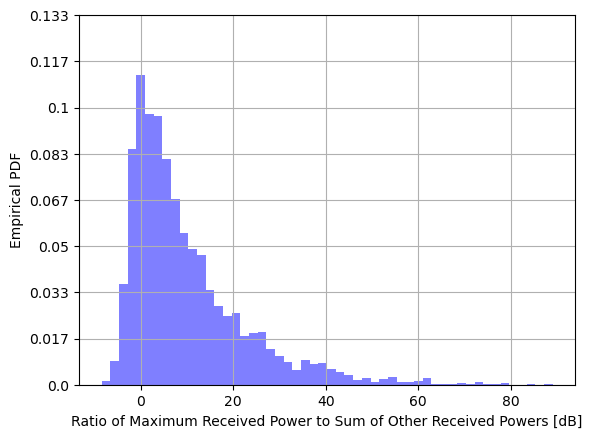

In [12]:
fig = plt.figure()
plt.grid()
hist ,bin_edges = np.histogram(ratio_power, bins='auto', density=False)
plt.hist(10*np.log10(ratio_power), bins='auto', alpha=0.5, color='blue', density=False)
locs, _ = plt.yticks() 
plt.yticks(locs,np.round(locs/len(ratio_power),3))

plt.xlabel('Ratio of Maximum Received Power to Sum of Other Received Powers [dB]')
plt.ylabel('Empirical PDF')
plt.show()

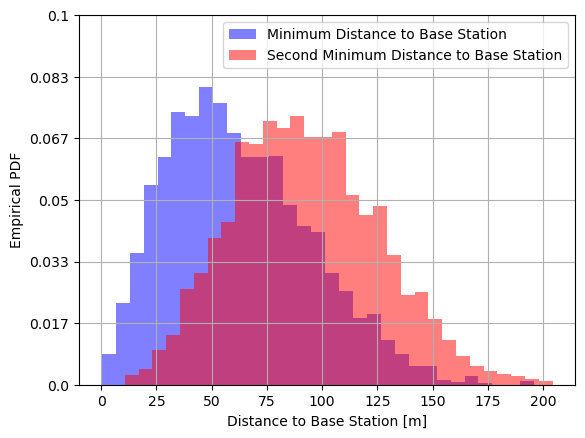

In [13]:
# Plot histogram of distances 
fig = plt.figure()
plt.grid()
plt.hist(min_distances, bins='auto', alpha=0.5, color='blue', density=False, label='Minimum Distance to Base Station')
locs, _ = plt.yticks()
plt.yticks(locs,np.round(locs/len(min_distances),3))
plt.hist(second_min_distances, bins='auto', alpha=0.5, color='red', density=False, label='Second Minimum Distance to Base Station')
locs, _ = plt.yticks()
plt.yticks(locs,np.round(locs/len(second_min_distances),3))
#plt.xlim([0, 10])
plt.xlabel('Distance to Base Station [m]')
plt.ylabel('Empirical PDF')
plt.legend()
plt.show()

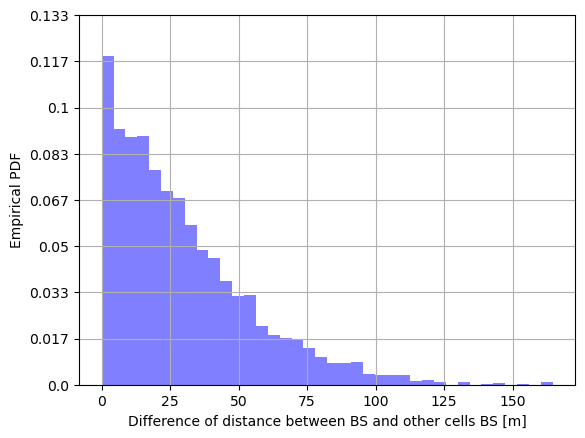

In [14]:
#Plot difference between max and second max
fig = plt.figure()
plt.grid()
plt.hist(second_min_distances - min_distances, bins='auto', alpha=0.5, color='blue', density=False)
locs, _ = plt.yticks()
plt.yticks(locs,np.round(locs/len(max_powers),3))
#plt.xlim([0, 10])
plt.xlabel('Difference of distance between BS and other cells BS [m]')
plt.ylabel('Empirical PDF')
plt.show()

In [15]:
# Sample from empirical distribution
sample = np.random.choice(ratio_power, 10, replace=True)

Gamma distribution parameters:  (2.6189733152002512, -8.492591978587324, 7.049984163337999)


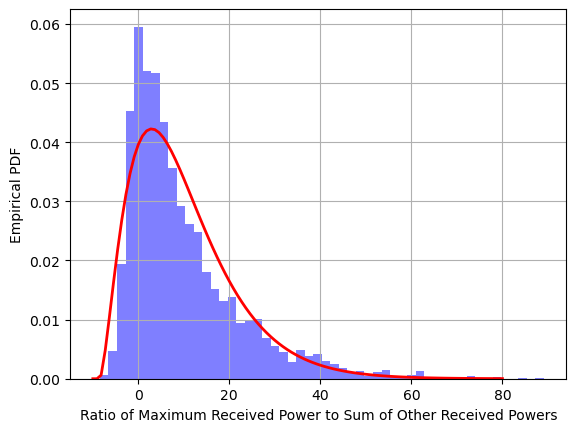

In [16]:
# Fit exponential distribution
import scipy.stats as st

params = st.gamma.fit(10*np.log10(ratio_power))
print("Gamma distribution parameters: ", params)


# Plot histogram of ratio_powers and exponential distribution
fig = plt.figure()
plt.grid()
plt.hist(10*np.log10(ratio_power), bins='auto', alpha=0.5, color='blue', density=True)
plt.plot(np.linspace(-10, 80, 100), st.gamma.pdf(np.linspace(-10, 80, 100), *params), color='red', lw=2)
#plt.xlim([0, 10])
plt.xlabel('Ratio of Maximum Received Power to Sum of Other Received Powers')
plt.ylabel('Empirical PDF')
plt.show()


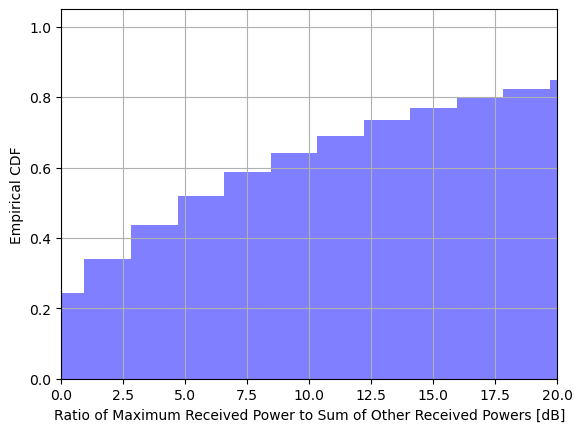

In [17]:
#Plot ccdf of ratio powers
fig = plt.figure()
plt.hist(10*np.log10(ratio_power), bins='auto', alpha=0.5, color='blue', density=True, cumulative=True)
plt.xlim([0, 20])
plt.xlabel('Ratio of Maximum Received Power to Sum of Other Received Powers [dB]')
plt.ylabel('Empirical CDF')
plt.grid()
plt.show()

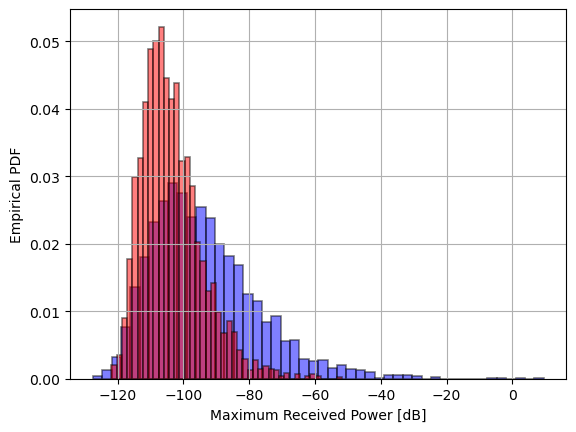

In [18]:
#Plot histograms of maximum and inter powers

fig = plt.figure()
plt.hist(10*np.log10(max_powers), bins='auto', alpha=0.5, color='blue', edgecolor='black', linewidth=1.2, density=True)
plt.hist(10*np.log10(inter_powers), bins='auto', alpha=0.5, color='red', edgecolor='black', linewidth=1.2, density=True)
#plt.xlim([0, 10e-6])
plt.xlabel('Maximum Received Power [dB]')
plt.ylabel('Empirical PDF')
plt.grid()
plt.show()

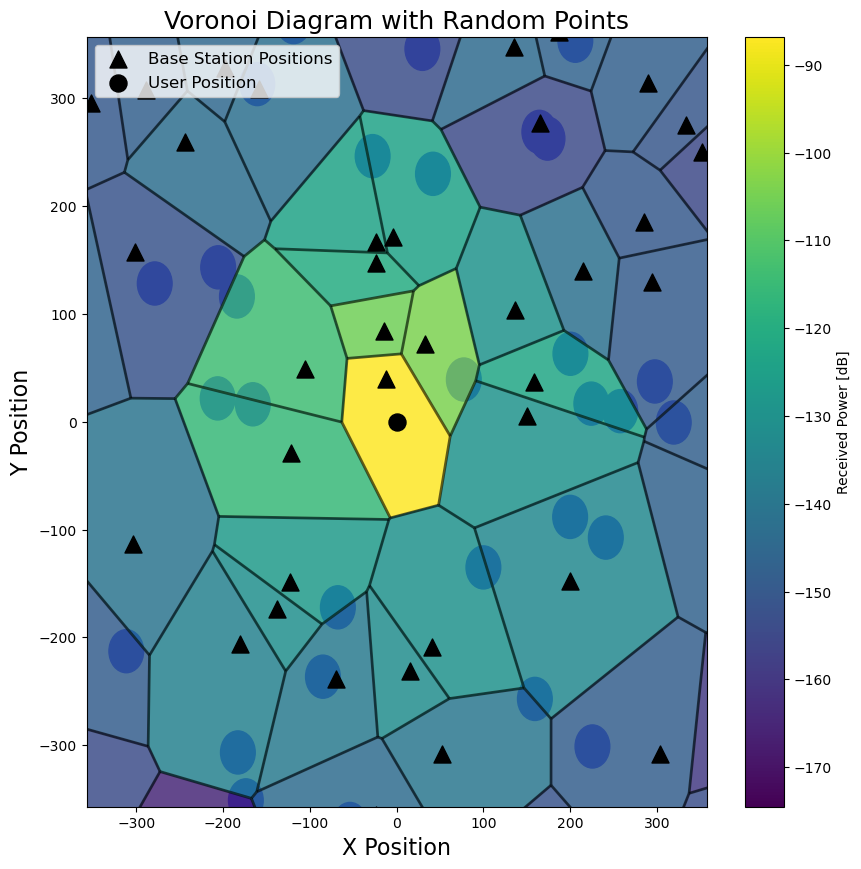

In [68]:
from obstacles import CircularObstacles
from utils import reflection_point_from_los, line_segment_circle_intersection_depth

np.random.seed(18)

# Set parameters
dim = 500
npoints = 64
r=20

user_position = np.array([0, 0])

# Generate random points
points = np.random.uniform(-dim, dim, (npoints, 2))

fig, ax = plt.subplots(figsize=(10, 10))  # Increase figure size

# Generate Obstacles 
obstacles = CircularObstacles.generate(npoints, radius=r)
obstacles.centers = obstacles.centers*dim*2
cond = obstacles.contains(points)
obstacles.centers =  obstacles.centers[~cond]
obstacles.draw(fill=True, color='blue', alpha=1)

# Create Voronoi diagram
vor = Voronoi(points)

# Plot Voronoi diagram with customizations
voronoi_plot_2d(vor, show_vertices=False, show_points=False, line_colors='k', line_width=2, line_alpha=0.6, ax=ax)

# Calculation of powers based on Ray Tracing
powers = received_power(points, alpha=6)
#Ray Tracing
center_obstacles = obstacles.centers
depths = np.zeros(len(points))
for j in range(len(center_obstacles)) :
    for i in range(len(points)) : 
        # Depth Line of Sight
        depths[i] += line_segment_circle_intersection_depth(x0=points[i,0], y0=points[i,1], x1=0, y1=0, xc=center_obstacles[j,0], yc=center_obstacles[j,1], rc=r) 

points_from_segments = reflection_point_from_los(x0=points[:,0], y0=points[:,1], z0=10, x1=0, y1=0, z1=2) #we consider the user to be at the center of the cell (0,0)
for j in range(len(center_obstacles)) :
    for i in range(len(points_from_segments)) : 
        #Between BS and reflection point
        depths[i] += line_segment_circle_intersection_depth(x0=points_from_segments[i,0], y0=points_from_segments[i,1], x1=0, y1=0, xc=center_obstacles[j,0], yc=center_obstacles[j,1], rc=r)
        #Between reflection point and smartphone
        depths[i] += line_segment_circle_intersection_depth(x0=points[i,0], y0=points[i,1], x1=points_from_segments[i,0], y1=points_from_segments[i,1], xc=center_obstacles[j,0], yc=center_obstacles[j,1], rc=r)

alpha_calc = 0.05 #0.05 #alpha used by default in received_power
powers_obstacles = powers*np.exp(-alpha_calc*depths)

minima = min(10*np.log10(powers_obstacles))
maxima = max(10*np.log10(powers_obstacles))

# Normalize chosen colormap
norm = mpl.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
#mapper = cm.ScalarMappable(norm=norm, cmap=cm.OrRd)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.viridis)

for r in range(len(vor.point_region)):
    region_index = vor.point_region[r]
    region = vor.regions[region_index]
    if region_index != -1 and -1 not in region and len(region) > 2:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), color=mapper.to_rgba(10*np.log10(powers_obstacles[r])), alpha=0.85)

# Plot points
plt.scatter(points[:, 0], points[:, 1], c='black', marker='^',  label='Base Station Positions', s=150)
plt.scatter(user_position[0], user_position[1], c='black', marker='o', label='User Position', s=150)

# Set plot limits and labels
plt.xlim(-dim/1.4, dim/1.4)
plt.ylim(-dim/1.4, dim/1.4)
plt.xlabel('X Position', fontsize=16)
plt.ylabel('Y Position', fontsize=16)
plt.title('Voronoi Diagram with Random Points', fontsize=18)

# Add colorbar
#sm = plt.cm.ScalarMappable(cmap=cm.OrRd, norm=norm)
sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Received Power [dB]')

# Add legend
plt.legend(loc='upper left', fontsize=12)

# Show the plot
#plt.grid(True)
plt.show()


In [49]:
print(np.max(powers)/(np.sum(powers) - np.max(powers)))
print(np.max(powers_obstacles)/(np.sum(powers_obstacles) - np.max(powers_obstacles)))

27.520094575753326
27.657236592222425


In [79]:
niters = 1000
ratio_power = np.zeros(niters)
ratio_power_obstacles = np.zeros(niters)
max_powers = np.zeros(niters)
max_powers_obstacles = np.zeros(niters)
inter_powers = np.zeros(niters)
inter_powers_obstacles = np.zeros(niters)

for k in range(niters) :
    
    # Set parameters
    dim = 500
    npoints = 64
    r=10

    user_position = np.array([0, 0])

    # Generate random points
    points = np.random.uniform(-dim, dim, (npoints, 2))

    # Generate Obstacles 
    obstacles = CircularObstacles.generate(npoints, radius=r)
    obstacles.centers = obstacles.centers*dim*2
    cond = obstacles.contains(points)
    obstacles.centers =  obstacles.centers[~cond]

    # Create Voronoi diagram
    vor = Voronoi(points)

    # Calculation of powers based on Ray Tracing
    powers = received_power(points, alpha=6)
    #Ray Tracing
    center_obstacles = obstacles.centers
    depths = np.zeros(len(points))
    for j in range(len(center_obstacles)) :
        for i in range(len(points)) : 
            # Depth Line of Sight
            depths[i] += line_segment_circle_intersection_depth(x0=points[i,0], y0=points[i,1], x1=0, y1=0, xc=center_obstacles[j,0], yc=center_obstacles[j,1], rc=r) 

    points_from_segments = reflection_point_from_los(x0=points[:,0], y0=points[:,1], z0=10, x1=0, y1=0, z1=2) #we consider the user to be at the center of the cell (0,0)
    for j in range(len(center_obstacles)) :
        for i in range(len(points_from_segments)) : 
            #Between BS and reflection point
            depths[i] += line_segment_circle_intersection_depth(x0=points_from_segments[i,0], y0=points_from_segments[i,1], x1=0, y1=0, xc=center_obstacles[j,0], yc=center_obstacles[j,1], rc=r)
            #Between reflection point and smartphone
            depths[i] += line_segment_circle_intersection_depth(x0=points[i,0], y0=points[i,1], x1=points_from_segments[i,0], y1=points_from_segments[i,1], xc=center_obstacles[j,0], yc=center_obstacles[j,1], rc=r)

    alpha_calc = 0.05 #alpha used by default in received_power
    powers_obstacles = powers*np.exp(-alpha_calc*depths)
    
    ratio_power[k] = np.max(powers)/(np.sum(powers) - np.max(powers))
    ratio_power_obstacles[k] = np.max(powers_obstacles)/(np.sum(powers_obstacles) - np.max(powers_obstacles))
    max_powers[k] = np.max(powers)
    max_powers_obstacles[k] = np.max(powers_obstacles)
    inter_powers[k] = np.sum(powers) - np.max(powers)
    inter_powers_obstacles[k] = np.sum(powers_obstacles) - np.max(powers_obstacles)


In [77]:
#10*np.log10(ratio_power)
for i in range(len(ratio_power)) : 
    if ratio_power[i] == 0 : 
       print("Mince")

Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Mince
Minc

C:\Users\bapti\AppData\Local\Temp\ipykernel_20804\1158676311.py:1: RuntimeWarning: divide by zero encountered in log10
  10*np.log10(ratio_power)


C:\Users\bapti\AppData\Local\Temp\ipykernel_20804\3530728714.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.hist(10*np.log10(ratio_power), bins='auto', alpha=0.5, color='blue', density=False, label='Without Obstacles')


ValueError: supplied range of [-inf, -0.88427579230548] is not finite

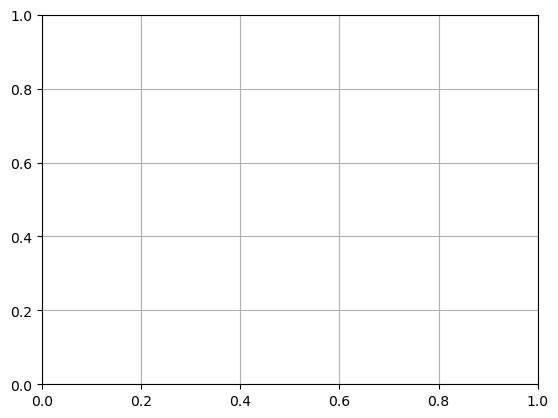

In [73]:
# Plot the histogram of the ratio of maximum power to sum of other powers
fig = plt.figure()
plt.grid()
# plt.hist(10*np.log10(ratio_power), bins='auto', alpha=0.5, color='blue', density=False, label='Without Obstacles')
# locs, _ = plt.yticks()
# plt.yticks(locs,np.round(locs/len(ratio_power),3))
plt.hist(10*np.log10(ratio_power_obstacles), bins='auto', alpha=0.5, color='red', density=False, label='With Obstacles')
locs, _ = plt.yticks()
plt.yticks(locs,np.round(locs/len(ratio_power_obstacles),3))
#plt.xlim([0, 10])
plt.xlabel('Ratio of Maximum Received Power to Sum of Other Received Powers [dB]')
plt.ylabel('Empirical PDF')
plt.legend()
plt.show()

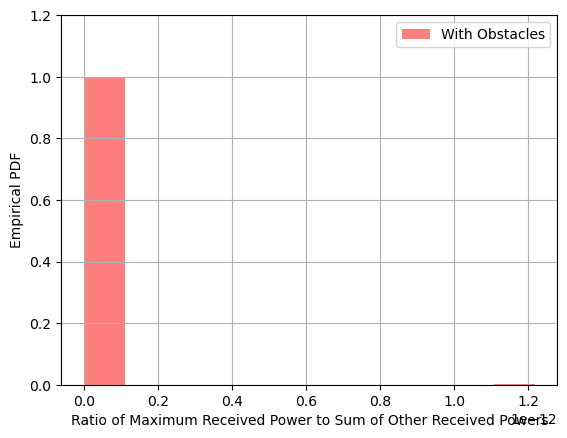

In [ ]:
# Plot the distribution of the ratio of maximum received power to sum of other received powers
fig = plt.figure()
plt.grid()
#plt.hist(inter_powers, bins='auto', alpha=0.5, color='blue', density=False, label='Without Obstacles')
#locs, _ = plt.yticks() 
#plt.yticks(locs,np.round(locs/len(inter_powers),3))
plt.hist(inter_powers_obstacles, bins='auto', alpha=0.5, color='red', density=False, label='With Obstacles')
locs, _ = plt.yticks() 
plt.yticks(locs,np.round(locs/len(inter_powers_obstacles),3))
#plt.xlim([0, 100])
plt.xlabel('Ratio of Maximum Received Power to Sum of Other Received Powers')
plt.ylabel('Empirical PDF')
plt.legend()
plt.show()